## Observations and Insights 

In [ ]:
# 1. The drug regimen, Capomulin and Ramicane was the most successful in reducing the tumor volume within the mice subject compared to the Infubinol and Ceftamin regimen.
# 2. There is a correlation of 0.84 meaning there is a positive correlation between the tumor volume and the weight of the mice. This means we should be careful when looking at tumor volume because of the weight of the mice will affect it.
# 3. There were more mice tested using the Capomulin and Ramicane drug regimen meaning the data may not be completely unbiased in comparing which drug regimen works best for the mice.
# 4. There is a good split between the gender of mice meaning the data does not show bias data towards only male or female mice.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice.
number_of_mice = combined_data_df["Mouse ID"].count()
print(f"There are {number_of_mice} mice.")

There are 1893 mice.


In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice_df = combined_data_df[combined_data_df.duplicated(['Mouse ID'])]
all_duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df.drop_duplicates('Mouse ID')
cleaned_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [20]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = cleaned_data_df['Mouse ID'].count()
print(f"There are {number_of_mice_clean} mice.")

There are 249 mice.


## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen = combined_data_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_mean = drug_regimen['Tumor Volume (mm3)'].mean()
regimen_median = drug_regimen['Tumor Volume (mm3)'].median()
regimen_variance = drug_regimen['Tumor Volume (mm3)'].var()
regimen_std = drug_regimen['Tumor Volume (mm3)'].std()
regimen_sem = drug_regimen['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_regimen_df = pd.DataFrame({"Mean": regimen_mean,
                                  "Median": regimen_median,
                                  "Variance": regimen_variance,
                                  "Standard Deviation": regimen_std,
                                  "SEM": regimen_sem})
summary_regimen_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen = combined_data_df.groupby('Drug Regimen')
agg_drug_regimen_df = agg_drug_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_drug_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

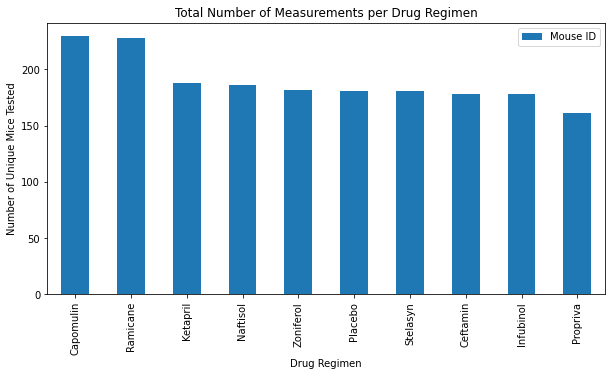

In [110]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
data_drug_regimen = pd.DataFrame(drug_regimen.count()).reset_index()
drug_bar_pandas = data_drug_regimen[['Drug Regimen', 'Mouse ID']]
drug_bar_pandas = drug_bar_pandas.set_index('Drug Regimen')

drug_bar_pandas = drug_bar_pandas.sort_values('Mouse ID', ascending=False)
drug_bar_pandas.plot(kind='bar', figsize=(10,5))
plt.title("Total Number of Measurements per Drug Regimen")
plt.ylabel('Number of Unique Mice Tested')
plt.show()

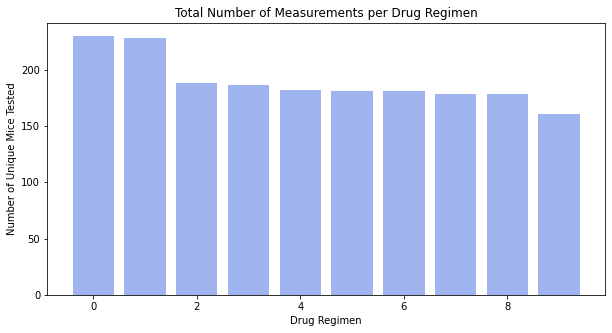

In [145]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
test_count = combined_data_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(test_count))

plt.figure(figsize=(10,5))
plt.bar(x_axis, test_count, color='royalblue', alpha=0.5, align='center')

plt.title('Total Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.show()

In [143]:
test_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

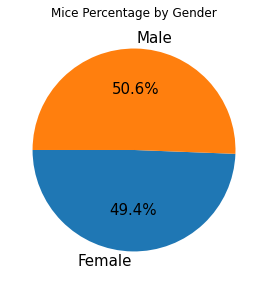

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(combined_data_df.groupby(['Sex']).count()).reset_index()
gender_data = gender_data[['Sex', 'Mouse ID']]

plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect='equal')
gender_data.plot(kind='pie', y = 'Mouse ID', ax=ax1, autopct='%1.1f%%', startangle=180,
                  labels=gender_data['Sex'], legend=False, fontsize=15)
plt.title("Mice Percentage by Gender")
plt.xlabel('')
plt.ylabel('')
plt.show()

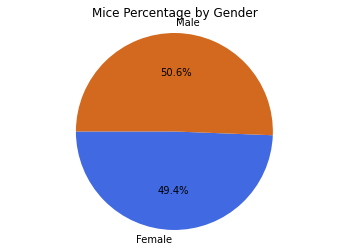

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = combined_data_df.groupby(['Sex'])['Mouse ID'].count().tolist()
labels = ['Female', 'Male']
colors = ['royalblue', 'chocolate']
plt.pie(gender_count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Mice Percentage by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_data = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin',:]
ramicane_data = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Ramicane',:]
infubinol_data = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Infubinol',:]
ceftamin_data = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Ceftamin',:]

In [37]:
capomulin_groupby = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_df = pd.DataFrame(capomulin_groupby)
capomulin_data_merge = pd.merge(capomulin_df, combined_data_df, on=("Mouse ID",'Timepoint'), how='left')

capomulin_tumor = capomulin_data_merge['Tumor Volume (mm3)']
capomulin_quartiles = capomulin_tumor.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Potential tumor volume outliers for mouse tested with the Capomulin regimen are values below {capomulin_lower_bound} and above {capomulin_upper_bound}.")

Potential tumor volume outliers for mouse tested with the Capomulin regimen are values below 20.70456164999999 and above 51.83201549.


In [38]:
ramicane_groupby = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ramicane_df = pd.DataFrame(ramicane_groupby)
ramicane_data_merge = pd.merge(ramicane_df, combined_data_df, on=("Mouse ID",'Timepoint'), how='left')

ramicane_tumor = ramicane_data_merge['Tumor Volume (mm3)']
ramicane_quartiles = ramicane_tumor.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Potential tumor volume outliers for mouse tested with the Ramicane regimen are values below {ramicane_lower_bound} and above {ramicane_upper_bound}.")

Potential tumor volume outliers for mouse tested with the Ramicane regimen are values below 17.912664470000003 and above 54.30681135.


In [39]:
infubinol_groupby = infubinol_data.groupby('Mouse ID').max()['Timepoint']
infubinol_df = pd.DataFrame(infubinol_groupby)
infubinol_data_merge = pd.merge(infubinol_df, combined_data_df, on=("Mouse ID",'Timepoint'), how='left')

infubinol_tumor = infubinol_data_merge['Tumor Volume (mm3)']
infubinol_quartiles = infubinol_tumor.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Potential tumor volume outliers for mouse tested with the Infubinol regimen are values below {infubinol_lower_bound} and above {infubinol_upper_bound}.")

Potential tumor volume outliers for mouse tested with the Infubinol regimen are values below 36.83290494999999 and above 82.74144559000001.


In [40]:
ceftamin_groupby = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_df = pd.DataFrame(ceftamin_groupby)
ceftamin_data_merge = pd.merge(ceftamin_df, combined_data_df, on=("Mouse ID",'Timepoint'), how='left')

ceftamin_tumor = ceftamin_data_merge['Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin_tumor.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Potential tumor volume outliers for mouse tested with the Ceftamin regimen are values below {ceftamin_lower_bound} and above {ceftamin_upper_bound}.")

Potential tumor volume outliers for mouse tested with the Ceftamin regimen are values below 25.355449580000002 and above 87.66645829999999.


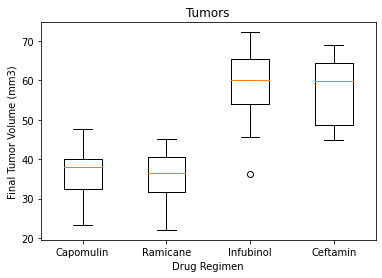

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_box_plot = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_box_plot, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

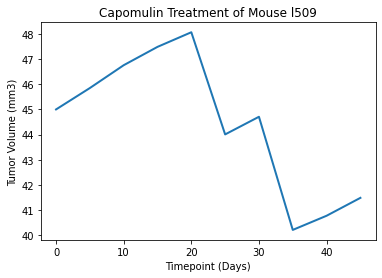

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]

x_axis_l509 = mouse_l509['Timepoint']
tumor_vol_l509 = mouse_l509['Tumor Volume (mm3)']

plt.title('Capomulin Treatment of Mouse l509')
plt.plot(x_axis_l509, tumor_vol_l509, linewidth=2, markersize=10)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.show()

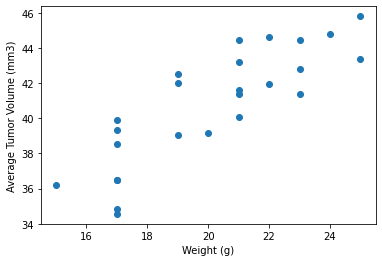

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

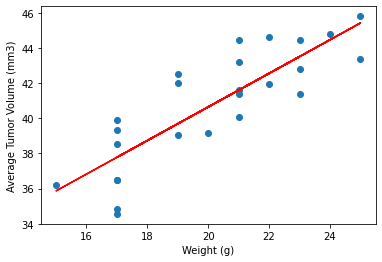

In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capomulin_corr = round(st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

regress_values = avg_tumor_vol['Weight (g)'] * slope + intercept
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'], regress_values, color='red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

In [67]:
capomulin_corr

0.84